# Basic problem-independent evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import eval

## Specify directory and data to analyse

In [2]:
directory = '../data/custom_heuristic/custom_ackley_10/'
all_csv_dict = eval.read_all(directory)
evaluations = all_csv_dict['evaluations.csv']
iterations = all_csv_dict['iterations.csv']
summary = all_csv_dict['summary.csv']
summary

,run,iterations,evaluations,best
0,1,500,12525,19.853368
1,2,500,12525,19.278731
2,3,500,12525,18.034907
3,4,500,12525,19.209989
4,5,500,12525,19.597257


## Calculate statistics of runs

### for iterations

In [3]:
# calculates statistics based on best_fx
stats_iter = eval.basic_statistics(iterations, 'iteration')
stats_iter

,mean_opt,std_opt,min_opt,max_opt,median_opt
iteration,,,,,
1,19.93630,0.480233,19.2100,20.3909,19.9675
10,19.19486,0.697925,18.0349,19.8534,19.2787
20,19.19486,0.697925,18.0349,19.8534,19.2787
30,19.19486,0.697925,18.0349,19.8534,19.2787
40,19.19486,0.697925,18.0349,19.8534,19.2787
50,19.19486,0.697925,18.0349,19.8534,19.2787
60,19.19486,0.697925,18.0349,19.8534,19.2787
70,19.19486,0.697925,18.0349,19.8534,19.2787
80,19.19486,0.697925,18.0349,19.8534,19.2787


### for evaluations

In [4]:
# evaluations are logged on improvement, thus evaluation numbers differ for every run. 
# missing data needs to be filled first (with data from previous evaluation log) to properly calculate statistics
filled_eval = eval.add_missing_values(evaluations, 'evaluation')

# group best_fx for each evaluation number and calculate statistics
stats_eval = eval.basic_statistics(filled_eval, 'evaluation')
stats_eval


,mean_opt,std_opt,min_opt,max_opt,median_opt
evaluation,,,,,
1,21.01192,0.550520,20.2396,21.4696,21.3489
2,20.73960,0.467717,20.2396,21.3832,20.6575
3,20.66006,0.406264,20.2396,21.2989,20.6575
4,20.65272,0.405390,20.2396,21.2989,20.6575
5,20.54294,0.472533,20.1086,21.2989,20.3909
7,20.42212,0.366588,20.1086,21.0484,20.3380
15,20.39614,0.311584,20.1086,20.9185,20.3380
16,20.38116,0.280436,20.1086,20.8436,20.3380
17,20.33508,0.213035,20.1086,20.6567,20.3380


## Plotting

<AxesSubplot:ylabel='best'>

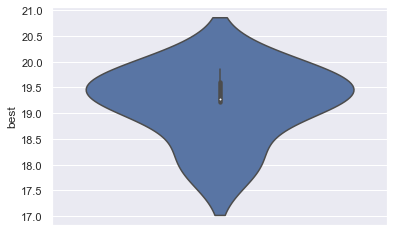

In [12]:
sns.set()
sns.violinplot(y=summary.best)

<AxesSubplot:ylabel='best'>

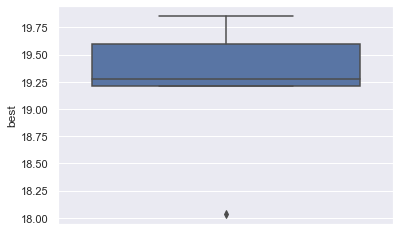

In [13]:
sns.boxplot(y=summary.best)

### Iterations

<AxesSubplot:xlabel='iteration'>

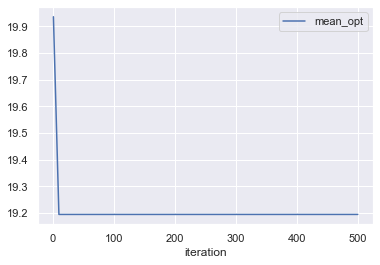

In [7]:
stats_iter.plot(y="mean_opt")

### Evaluations

<AxesSubplot:xlabel='evaluation'>

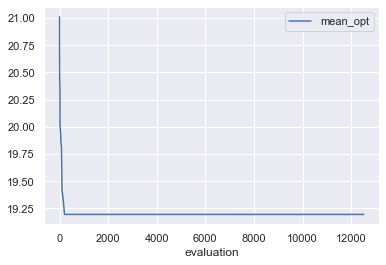

In [8]:
stats_eval.plot(y="mean_opt")